# Money and Sports

In [1]:
import plot_lib as pl, stats_lib as sl, pandas as pd

## Exercise One

In [ ]:
df = pd.read_csv('team_salaries.csv')
years = df['year'].unique()
df = df.set_index(["year", "team"]).sort_index()
df["salary_pct"] = df["salary"] / df.groupby('year')["salary"].sum()

stats = pd.DataFrame()
stats['year'] = years
stats = stats.set_index('year')


## Exercise Two

In [9]:
stats['mean'] = df.groupby('year')["salary"].mean()
stats['median'] = df.groupby('year')['salary'].median()
stats['std'] = df.groupby('year')['salary'].std()
stats['min'] = df.groupby('year')['salary'].min()
stats['max'] = df.groupby('year')['salary'].max()
stats['std_to_mean'] = stats['std']/stats['mean']

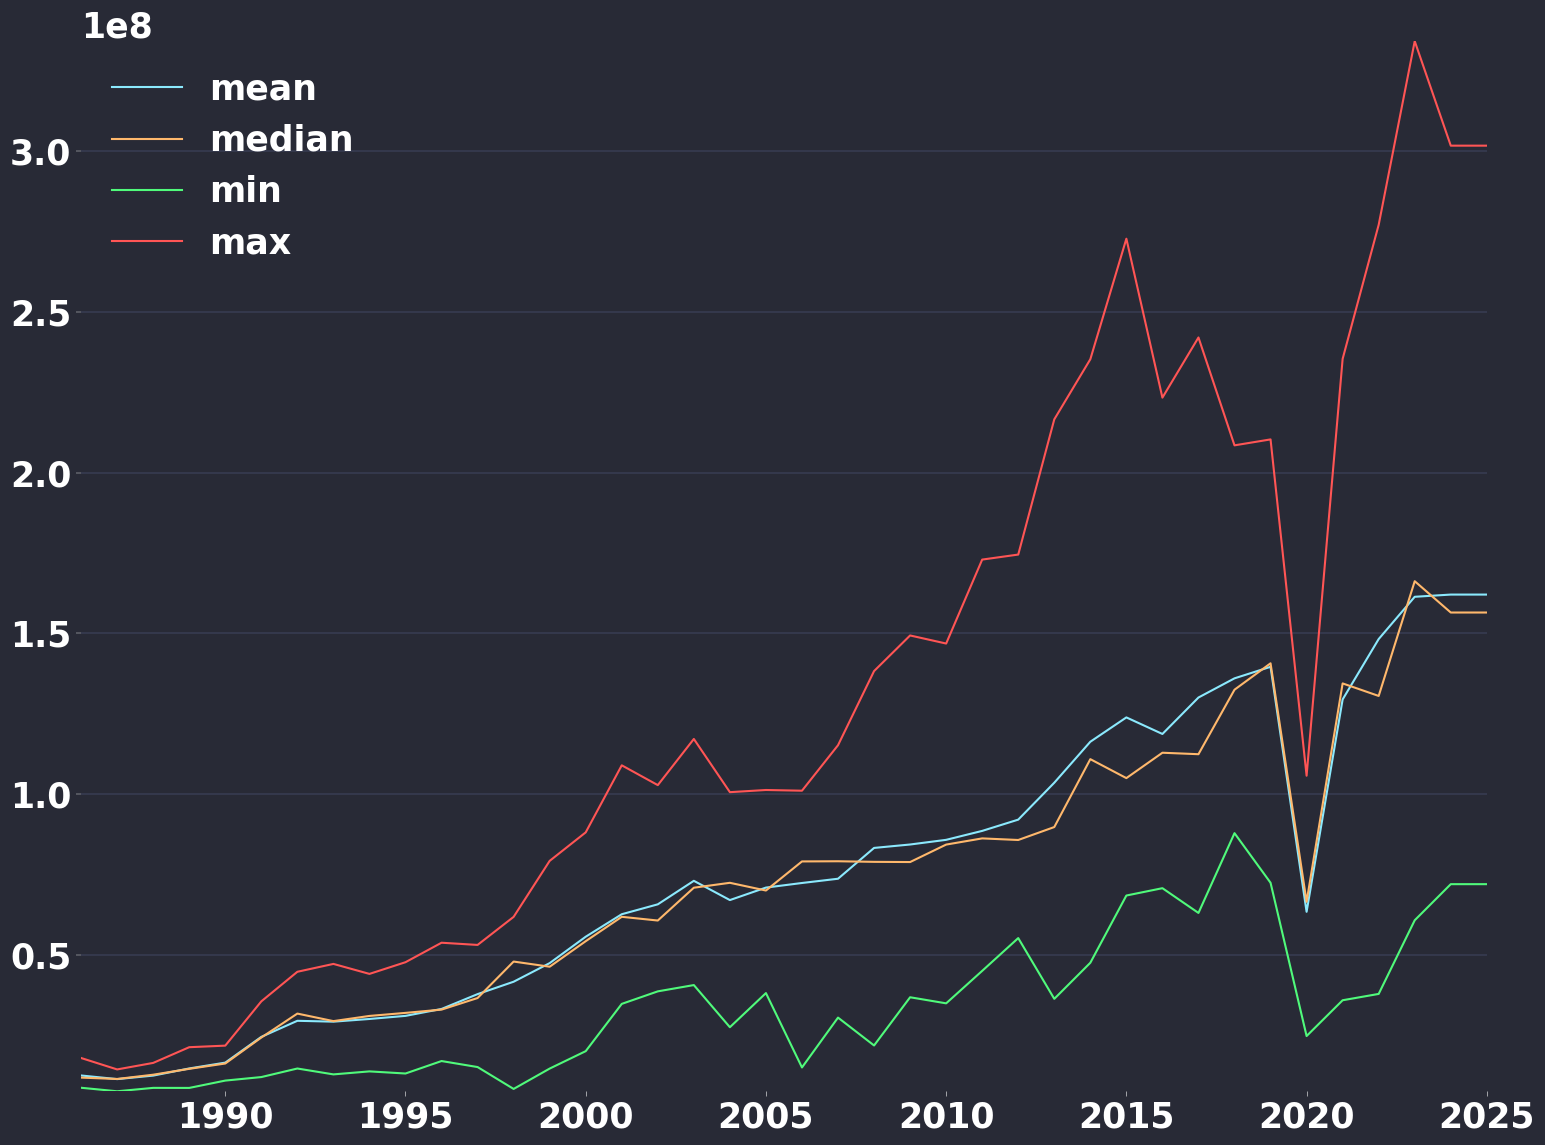

In [ ]:
plots = []
for stat_name in ['mean', 'median', 'min', 'max']:
    plots.append(pl.LinePlot(years, stats[stat_name], label=stat_name))
sp = pl.SubPlot([plots]).plot()

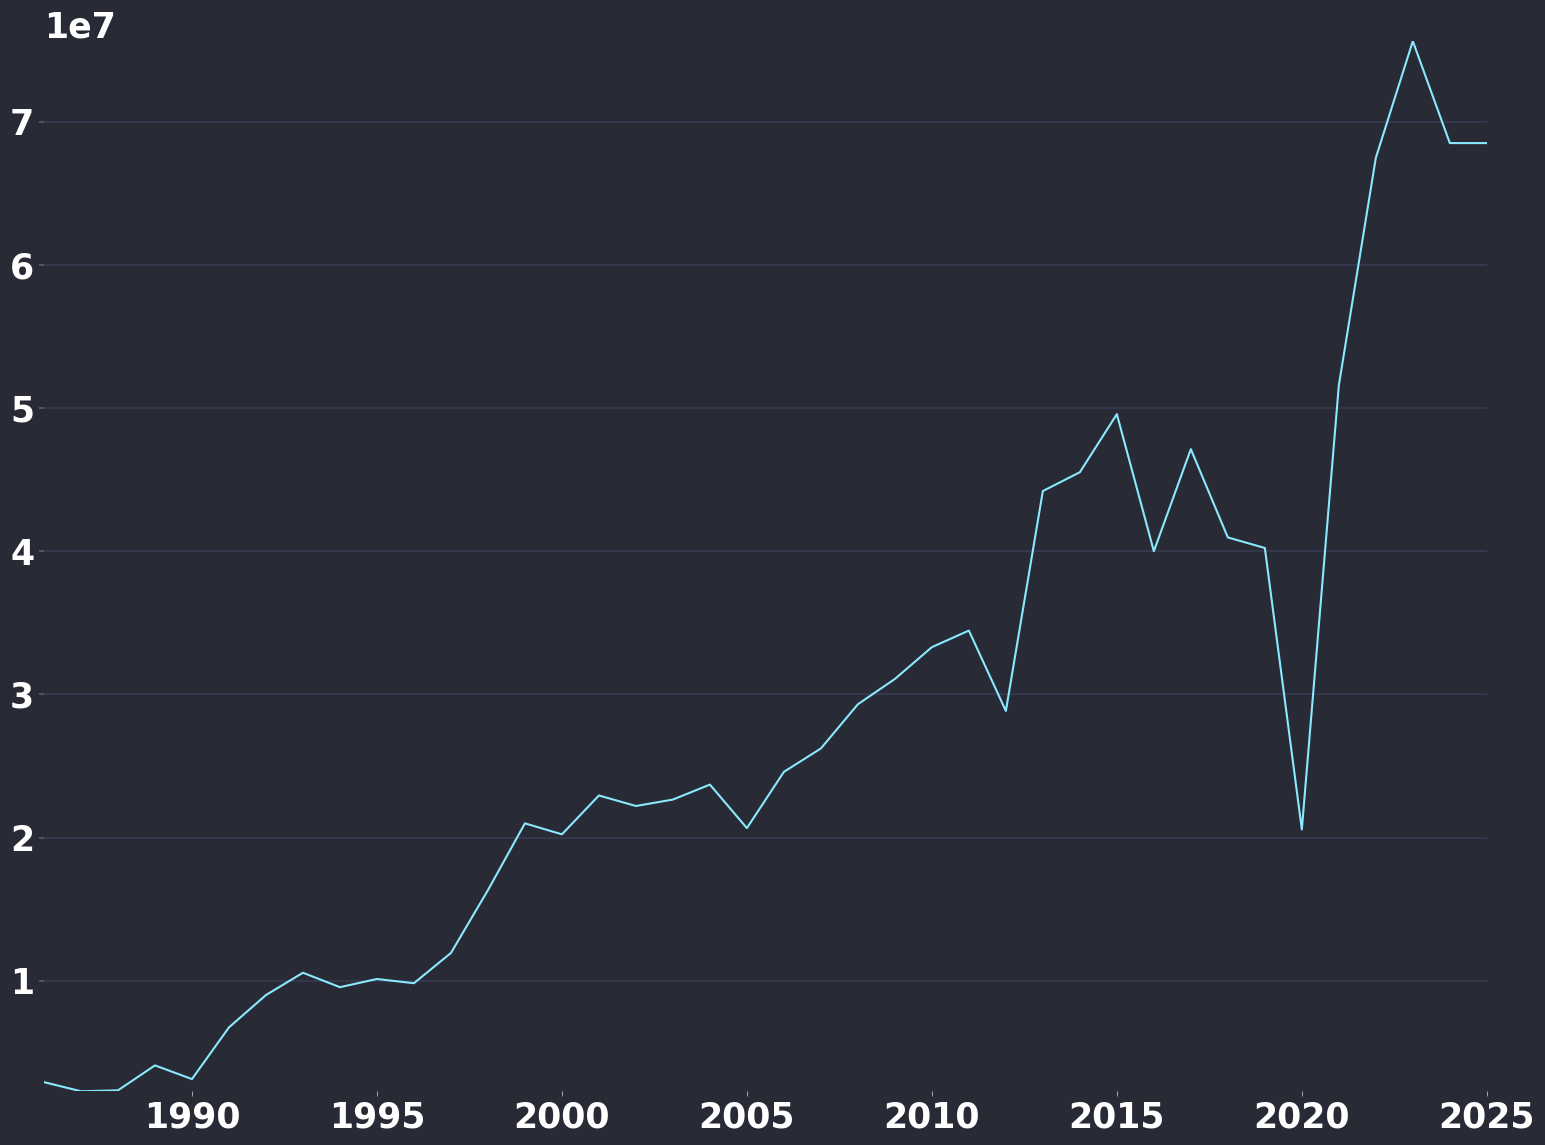

In [8]:
std_plot = pl.LinePlot(years, stats['std'])
sp = pl.SubPlot([[std_plot]]).plot()

/Users/247304/Projects/money-and-sports/plot_lib.py:223: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


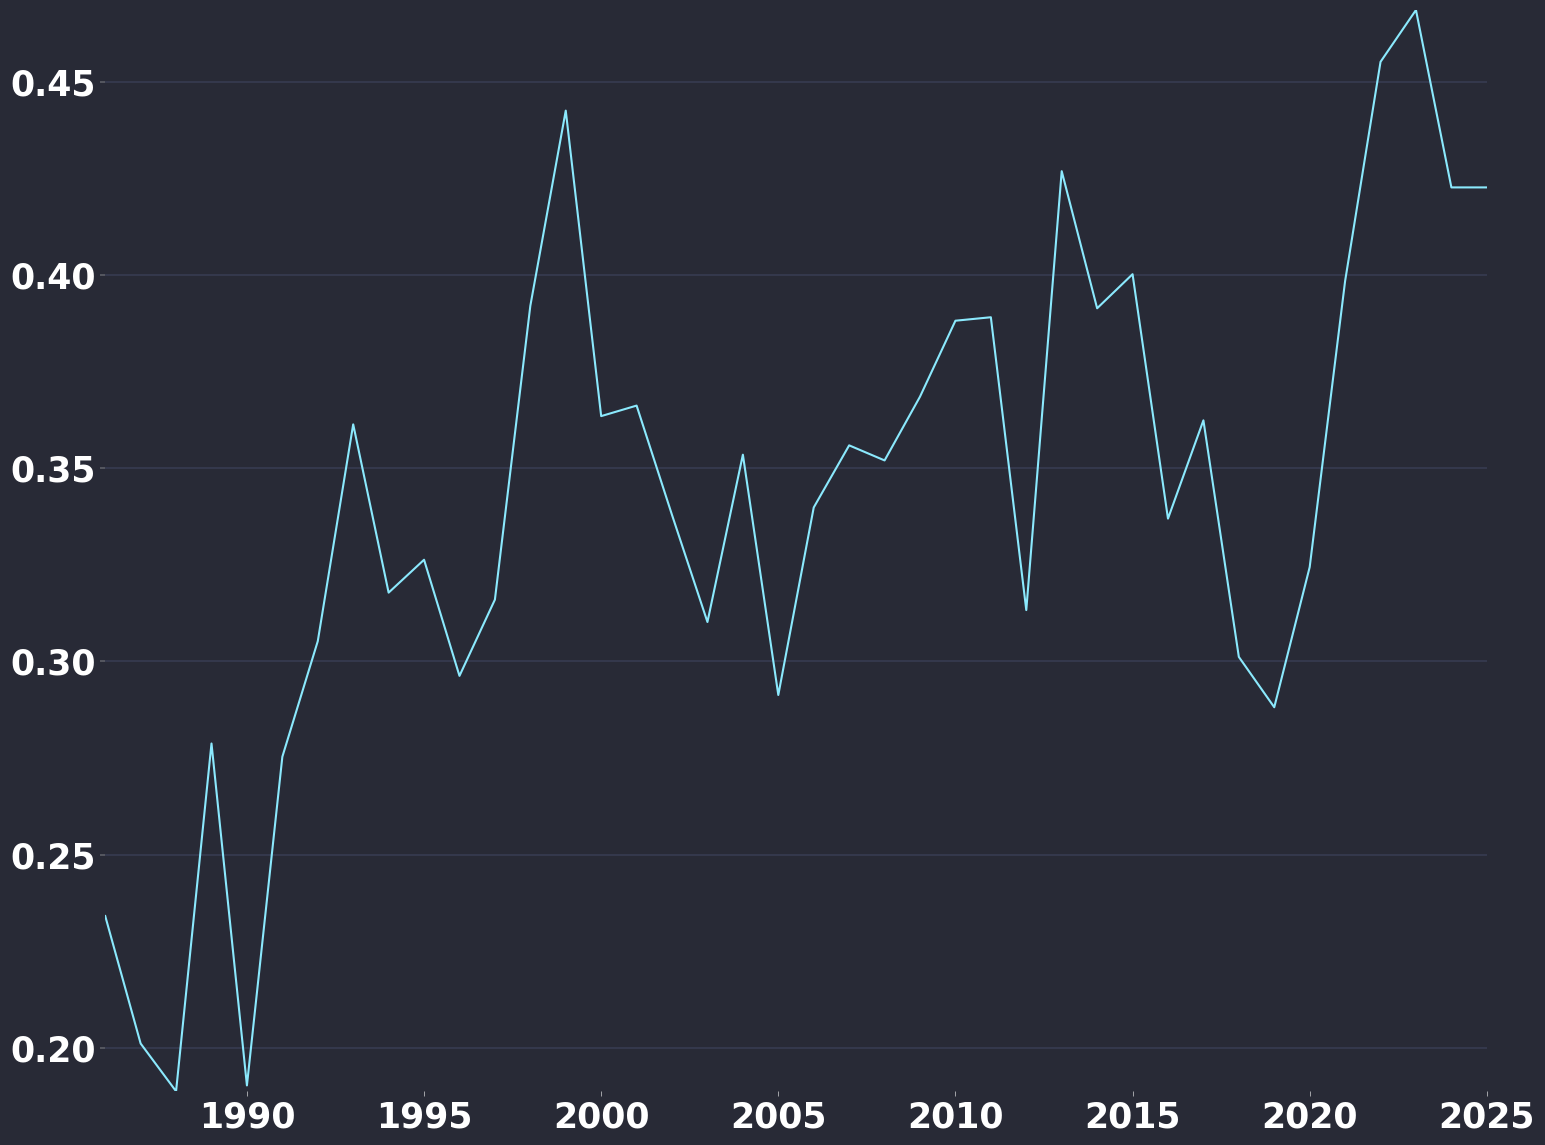

In [10]:
salary_to_mean_plot = pl.LinePlot(years, stats['std_to_mean'])
sp = pl.SubPlot([[salary_to_mean_plot]]).plot()

# Exercise 3

In [ ]:
stats['sal_win_pct_correlation'] = stats.apply(sl.get_correlation(df.groupby('year').agg))